In [10]:
# Importar librerías
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

In [11]:
# Verificar estructura de archivos
print("Estructura de archivos:")
print("----------------------")

# Verificar si existe la carpeta models
models_dir = 'models'
if os.path.exists(models_dir):
    model_files = os.listdir(models_dir)
    print(f"📁 models/: {model_files}")
else:
    print("❌ models/ no existe")

# Verificar si existen datos procesados
data_files = []
if os.path.exists('data/processed'):
    data_files = os.listdir('data/processed')
    print(f"📁 data/processed/: {data_files}")
else:
    print("❌ data/processed/ no existe")

# %%
# Cargar datos de entrenamiento
try:
    X_train = np.load('data/processed/X_train.npy')
    y_train = np.load('data/processed/y_train.npy')
    print(f"✅ Datos cargados: X_train {X_train.shape}, y_train {y_train.shape}")
except Exception as e:
    print(f"❌ Error cargando datos: {e}")
    print("\n💡 Solución: Ejecuta primero el preprocesamiento")
    print("   Comando: python src/data_preprocessing.py")

# %%
# Cargar resultados del entrenamiento si existen
if os.path.exists('models/model_performance.csv'):
    results_df = pd.read_csv('models/model_performance.csv')
    print("📊 Resultados del entrenamiento:")
    print(results_df.to_string(index=False))
else:
    print("📝 No se encontraron resultados de entrenamiento.")
    print("\n💡 Solución: Ejecuta el entrenamiento de modelos")
    print("   Comando: python src/model_training.py")

# %%
# Función para ejecutar entrenamiento desde el notebook
def run_training():
    """Ejecutar el entrenamiento de modelos directamente"""
    print("🚀 Ejecutando entrenamiento...")
    
    try:
        # Importar el módulo de entrenamiento
        from src.model_training import HousePricesModelTrainer
        
        # Crear instancia y ejecutar
        trainer = HousePricesModelTrainer()
        X_train, y_train, X_test = trainer.load_processed_data()
        
        if X_train is not None:
            results_df = trainer.train_models(X_train, y_train)
            trainer.evaluate_model(X_train, y_train)
            trainer.save_model()
            
            print("✅ Entrenamiento completado exitosamente")
            return True
        else:
            print("❌ No se pudieron cargar los datos para entrenamiento")
            return False
            
    except Exception as e:
        print(f"❌ Error durante el entrenamiento: {e}")
        return False

# %%
# Cargar y evaluar modelo si existe
model_loaded = False
best_model = None
model_name = ""

if os.path.exists('models') and any(f.endswith('.joblib') for f in os.listdir('models')):
    try:
        # Encontrar el archivo del modelo
        model_files = [f for f in os.listdir('models') if f.endswith('.joblib')]
        best_model_path = f'models/{model_files[0]}'
        best_model = joblib.load(best_model_path)
        model_name = model_files[0].replace('best_model_', '').replace('.joblib', '').replace('_', ' ').title()
        
        print(f"📦 Modelo cargado: {model_name}")
        model_loaded = True
        
    except Exception as e:
        print(f"❌ Error cargando el modelo: {e}")
else:
    print("🤖 No hay modelos entrenados disponibles.")


Estructura de archivos:
----------------------
📁 models/: ['best_model_ridge_regression.joblib', 'model_performance.csv', 'preprocessor.joblib', 'feature_names.csv']
📁 data/processed/: ['y_train.npy', 'X_test.npy', 'test_ids.csv', 'X_train.npy', 'feature_names.csv']
✅ Datos cargados: X_train (1458, 146), y_train (1458,)
📊 Resultados del entrenamiento:
    rmse      mae       r2            model
0.112379 0.079741 0.920901 Ridge Regression
📦 Modelo cargado: Ridge Regression


📊 Métricas de rendimiento:
   RMSE: 0.1124
   MAE: 0.0797
   R²: 0.9209


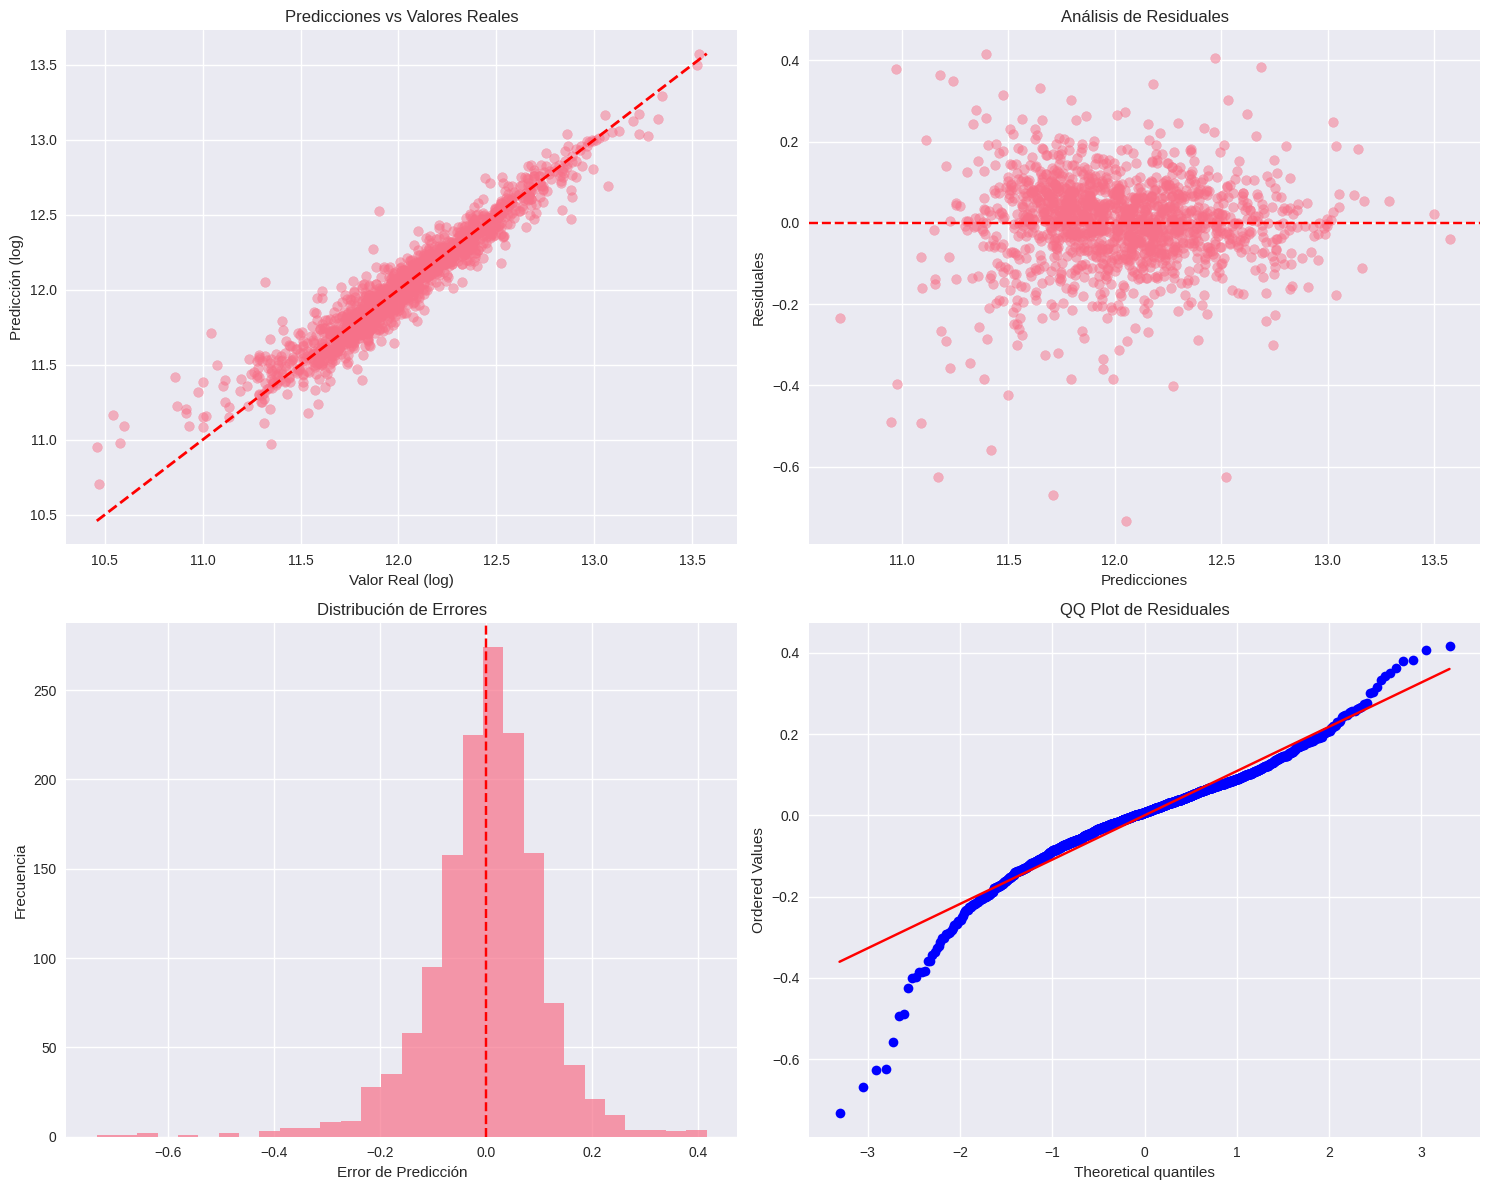


💰 MÉTRICAS EN DÓLARES:
   RMSE: $19,784.56
   MAE: $13,546.59
   Error típico: ±$13,547

📈 ANÁLISIS DE ERROR POR RANGO DE PRECIO:
                          mean       std  count
price_range                                    
(34179.9, 178920.0]   -1044.72  15146.08    870
(178920.0, 322940.0]   1958.46  20159.61    507
(322940.0, 466960.0]   9810.66  36370.85     70
(466960.0, 610980.0]  70441.72  53814.51      7
(610980.0, 755000.0]  30426.17  54733.03      4
¿Quieres ejecutar el entrenamiento ahora?
Esto puede tomar varios minutos...
📋 INFORMACIÓN DEL SISTEMA:
Python: 3.12.3
Sistema: Linux 6.8.0-79-generic
Directorio de trabajo: /home/mz8k/house-prices-ml-pipeline
Archivos en models/: ['best_model_ridge_regression.joblib', 'model_performance.csv', 'preprocessor.joblib', 'feature_names.csv']


/tmp/ipykernel_38075/534717313.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_summary = error_analysis.groupby('price_range')['error_dollars'].agg(['mean', 'std', 'count'])


In [14]:
# Si tenemos un modelo, hacer predicciones y visualizaciones
if model_loaded and 'X_train' in locals() and 'y_train' in locals():
    # Hacer predicciones
    y_pred = best_model.predict(X_train)
    
    # Calcular métricas
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    mae = mean_absolute_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    
    print(f"📊 Métricas de rendimiento:")
    print(f"   RMSE: {rmse:.4f}")
    print(f"   MAE: {mae:.4f}")
    print(f"   R²: {r2:.4f}")
    
    # Visualización
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Scatter plot
    axes[0, 0].scatter(y_train, y_pred, alpha=0.5)
    max_val = max(y_train.max(), y_pred.max())
    min_val = min(y_train.min(), y_pred.min())
    axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
    axes[0, 0].set_xlabel('Valor Real (log)')
    axes[0, 0].set_ylabel('Predicción (log)')
    axes[0, 0].set_title('Predicciones vs Valores Reales')
    
    # Residual plot
    residuals = y_train - y_pred
    axes[0, 1].scatter(y_pred, residuals, alpha=0.5)
    axes[0, 1].axhline(y=0, color='r', linestyle='--')
    axes[0, 1].set_xlabel('Predicciones')
    axes[0, 1].set_ylabel('Residuales')
    axes[0, 1].set_title('Análisis de Residuales')
    
    # Distribution of errors
    axes[1, 0].hist(residuals, bins=30, alpha=0.7)
    axes[1, 0].axvline(x=0, color='r', linestyle='--')
    axes[1, 0].set_xlabel('Error de Predicción')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].set_title('Distribución de Errores')
    
    # QQ plot para normalidad de residuales
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('QQ Plot de Residuales')
    
    plt.tight_layout()
    plt.show()
    
    # Transformación inversa para interpretación en dólares
    predicted_prices = np.expm1(y_pred)
    actual_prices = np.expm1(y_train)
    
    rmse_dollars = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
    mae_dollars = mean_absolute_error(actual_prices, predicted_prices)
    
    print("\n💰 MÉTRICAS EN DÓLARES:")
    print(f"   RMSE: ${rmse_dollars:,.2f}")
    print(f"   MAE: ${mae_dollars:,.2f}")
    print(f"   Error típico: ±${mae_dollars:,.0f}")
    
    # Análisis de errores por rango de precio
    price_bins = pd.cut(actual_prices, bins=5)
    error_analysis = pd.DataFrame({
        'actual_price': actual_prices,
        'error_dollars': actual_prices - predicted_prices,
        'price_range': price_bins
    })
    
    error_summary = error_analysis.groupby('price_range')['error_dollars'].agg(['mean', 'std', 'count'])
    print("\n📈 ANÁLISIS DE ERROR POR RANGO DE PRECIO:")
    print(error_summary.round(2))

# %%
# Opción para ejecutar entrenamiento directamente desde el notebook
print("¿Quieres ejecutar el entrenamiento ahora?")
print("Esto puede tomar varios minutos...")

# Para ejecutar, descomenta la siguiente línea:
# run_training()

# %%
# Si no hay modelo, mostrar instrucciones
if not model_loaded:
    print("""
    🚨 INSTRUCCIONES PARA OBTENER RESULTADOS:
    
    1. Abre una terminal en VS Code (Ctrl + `)
    2. Asegúrate de estar en el entorno virtual:
       source house_prices_venv/bin/activate
    3. Ejecuta el preprocesamiento (si no lo has hecho):
       python src/data_preprocessing.py
    4. Ejecuta el entrenamiento:
       python src/model_training.py
    5. Vuelve a ejecutar este notebook
    
    💡 Si el entrenamiento falla por recursos, prueba:
       python src/simple_model_training.py
    """)

# %%
# Verificar características importantes si es un modelo de árboles
if model_loaded and hasattr(best_model, 'feature_importances_'):
    try:
        # Cargar nombres de características
        feature_names = pd.read_csv('data/processed/feature_names.csv').iloc[:, 0].tolist()
        
        # Obtener importancia de características
        importances = best_model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        # Top 15 características más importantes
        print("🔝 TOP 15 CARACTERÍSTICAS MÁS IMPORTANTES:")
        plt.figure(figsize=(12, 8))
        plt.title("Importancia de Características")
        plt.barh(range(15), importances[indices[:15]][::-1])
        plt.yticks(range(15), [feature_names[i] for i in indices[:15]][::-1])
        plt.xlabel('Importancia')
        plt.tight_layout()
        plt.show()
        
    except Exception as e:
        print(f"⚠️ No se pudieron cargar los nombres de características: {e}")


# Información del sistema (útil para debugging)
import platform
print("📋 INFORMACIÓN DEL SISTEMA:")
print(f"Python: {platform.python_version()}")
print(f"Sistema: {platform.system()} {platform.release()}")
print(f"Directorio de trabajo: {os.getcwd()}")
print(f"Archivos en models/: {os.listdir('models') if os.path.exists('models') else 'No existe'}")


## Interpretación de Resultados
 
 ### Métricas clave:
 - **RMSE**: Error cuadrático medio en escala logarítmica
 - **MAE**: Error absoluto medio - más fácil de interpretar
 - **R²**: Porcentaje de varianza explicada (0-1, más alto es mejor)
 
 ### En dólares:
 - **MAE en dólares**: Error promedio en términos de precio real
 - **RMSE en dólares**: Penaliza más los errores grandes
 
 ### Análisis de residuales:
 - Los puntos deben distribuirse aleatoriamente alrededor de la línea roja
 - Patrones sistemáticos indican que el modelo puede mejorar
 - Los residuales deberían seguir una distribución normal

 ___



# Resumen Final del Modelo Entrenado

RESUMEN FINAL DEL MODELO DE MACHINE LEARNING
Modelo seleccionado: Ridge Regression
Archivo del modelo: models/best_model_ridge_regression.joblib

Métricas de rendimiento:
   RMSE: 0.1124
   MAE: 0.0797
   R2: 0.9209

Métricas en dólares:
   RMSE: $19,784.56
   MAE: $13,546.59
   Error porcentual: 7.49%

Capacidad predictiva:
   El modelo explica el 92.09% de la variabilidad en los precios
   Error promedio: ±$13,547 por propiedad

Análisis de error por quintiles de precio:
               error_dollars                 error_percentage       
                        mean       std count             mean    std
price_quintile                                                      
Muy Bajo            -4940.90  14876.65   295            -6.78  18.12
Bajo                  600.58  15571.47   294             0.47  11.25
Medio                1505.87  14329.18   286             0.92   8.81
Alto                  381.19  16126.35   294             0.10   8.08
Muy Alto             7348.89  30972.15 

/tmp/ipykernel_38075/412446357.py:66: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintile_stats = error_analysis.groupby('price_quintile').agg({


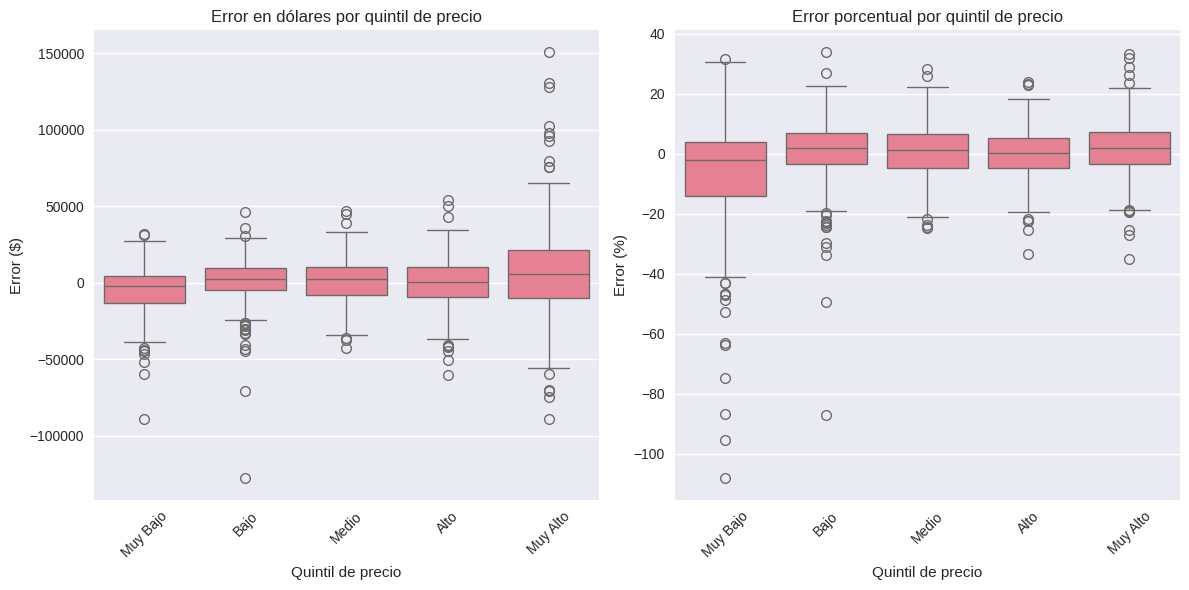

In [17]:

# Resumen completo del desempeño del modelo
print("=" * 60)
print("RESUMEN FINAL DEL MODELO DE MACHINE LEARNING")
print("=" * 60)

# Cargar el mejor modelo
model_files = [f for f in os.listdir('models') if f.endswith('.joblib')]
best_model_path = f'models/{model_files[0]}'
best_model = joblib.load(best_model_path)
model_name = model_files[0].replace('best_model_', '').replace('.joblib', '').replace('_', ' ').title()

print(f"Modelo seleccionado: {model_name}")
print(f"Archivo del modelo: {best_model_path}")

# Cargar resultados de desempeño
if os.path.exists('models/model_performance.csv'):
    results_df = pd.read_csv('models/model_performance.csv')
    print("\nMétricas de rendimiento:")
    for metric, value in results_df.iloc[0].items():
        if metric != 'model':
            print(f"   {metric.upper()}: {value:.4f}")

# Hacer predicciones finales
X_train = np.load('data/processed/X_train.npy')
y_train = np.load('data/processed/y_train.npy')
y_pred = best_model.predict(X_train)

# Métricas en escala logarítmica
rmse_log = np.sqrt(mean_squared_error(y_train, y_pred))
mae_log = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

# Métricas en dólares
y_train_dollars = np.expm1(y_train)
y_pred_dollars = np.expm1(y_pred)
rmse_dollars = np.sqrt(mean_squared_error(y_train_dollars, y_pred_dollars))
mae_dollars = mean_absolute_error(y_train_dollars, y_pred_dollars)

print(f"\nMétricas en dólares:")
print(f"   RMSE: ${rmse_dollars:,.2f}")
print(f"   MAE: ${mae_dollars:,.2f}")
print(f"   Error porcentual: {(mae_dollars / np.mean(y_train_dollars)) * 100:.2f}%")

print(f"\nCapacidad predictiva:")
print(f"   El modelo explica el {r2 * 100:.2f}% de la variabilidad en los precios")
print(f"   Error promedio: ±${mae_dollars:,.0f} por propiedad")

# %%
# Análisis de errores por percentil de precio
actual_prices = np.expm1(y_train)
predicted_prices = np.expm1(y_pred)
errors = actual_prices - predicted_prices
error_percentage = (errors / actual_prices) * 100

# Crear DataFrame para análisis
error_analysis = pd.DataFrame({
    'actual_price': actual_prices,
    'predicted_price': predicted_prices,
    'error_dollars': errors,
    'error_percentage': error_percentage
})

# Calcular estadísticas por quintiles
error_analysis['price_quintile'] = pd.qcut(error_analysis['actual_price'], 5, labels=['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Muy Alto'])

quintile_stats = error_analysis.groupby('price_quintile').agg({
    'error_dollars': ['mean', 'std', 'count'],
    'error_percentage': ['mean', 'std']
}).round(2)

print("\nAnálisis de error por quintiles de precio:")
print(quintile_stats)

# %%
# Visualización de errores por rango de precio
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='price_quintile', y='error_dollars', data=error_analysis)
plt.title('Error en dólares por quintil de precio')
plt.xticks(rotation=45)
plt.xlabel('Quintil de precio')
plt.ylabel('Error ($)')

plt.subplot(1, 2, 2)
sns.boxplot(x='price_quintile', y='error_percentage', data=error_analysis)
plt.title('Error porcentual por quintil de precio')
plt.xticks(rotation=45)
plt.xlabel('Quintil de precio')
plt.ylabel('Error (%)')

plt.tight_layout()
plt.show()


